In [4]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt

from data_gen import *
from predict_info import *

import datetime
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, confusion_matrix

# Data gen

In [5]:
X, y, df = data_gen(N_data=1000,bkg=(10,50)) 
# N_data=100000,N_tu=256,x0=(64, 196),w=(5,15),A=(1,20),bkg=(1,15)


#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Conv1D

In [6]:
conv1d_model = tf.keras.models.load_model("conv1d_model")

# Autoencoder_dense, bn=16

True Negatives:  468
False Positives:  47
False Negatives:  54
True Positives:  431
Total:  1000
True / False - 899 / 101 - 89.9 / 10.1


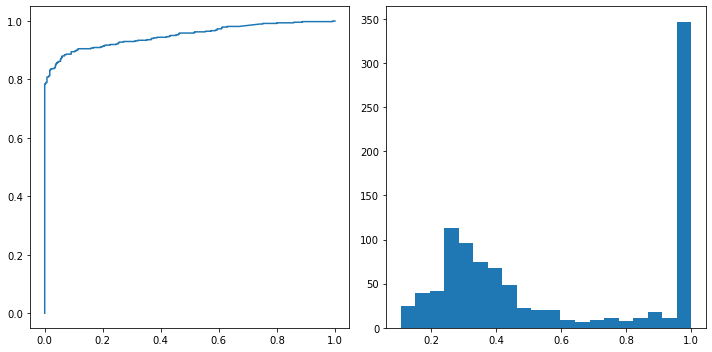

In [7]:
autoencoder = tf.keras.models.load_model("autoencoder_dense")
X_denoised = autoencoder.predict(X)
y_pred = conv1d_model.predict(X_denoised)
predict_graph_info(y, y_pred)

# Autoencoder_dense, bn=8

True Negatives:  308
False Positives:  207
False Negatives:  34
True Positives:  451
Total:  1000
True / False - 759 / 241 - 75.9 / 24.1


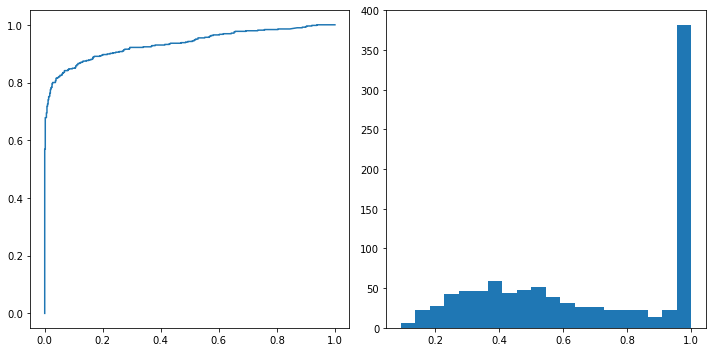

In [8]:
autoencoder2 = tf.keras.models.load_model("autoencoder_dense_2")
X_denoised_2 = autoencoder2.predict(X)
y_pred_2 = conv1d_model.predict(X_denoised_2)
predict_graph_info(y, y_pred_2)

#  Autoencoder_conv1D, bn=16

True Negatives:  438
False Positives:  77
False Negatives:  82
True Positives:  403
Total:  1000
True / False - 841 / 159 - 84.1 / 15.9


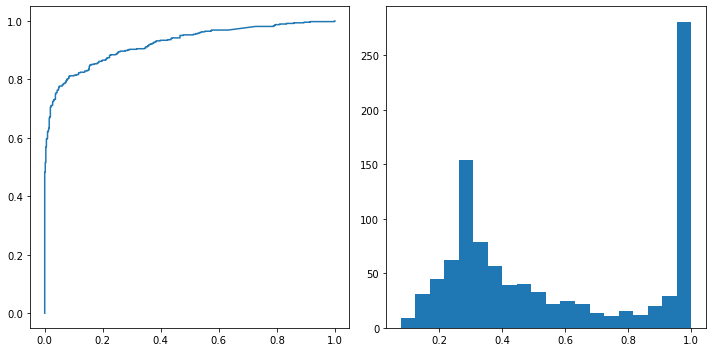

In [9]:
autoencoder_conv1d = tf.keras.models.load_model("autoencoder_conv1D")
X_denoised_conv1d = autoencoder_conv1d.predict(X)
y_pred_conv1d = conv1d_model.predict(X_denoised_conv1d)
predict_graph_info(y, y_pred_conv1d)

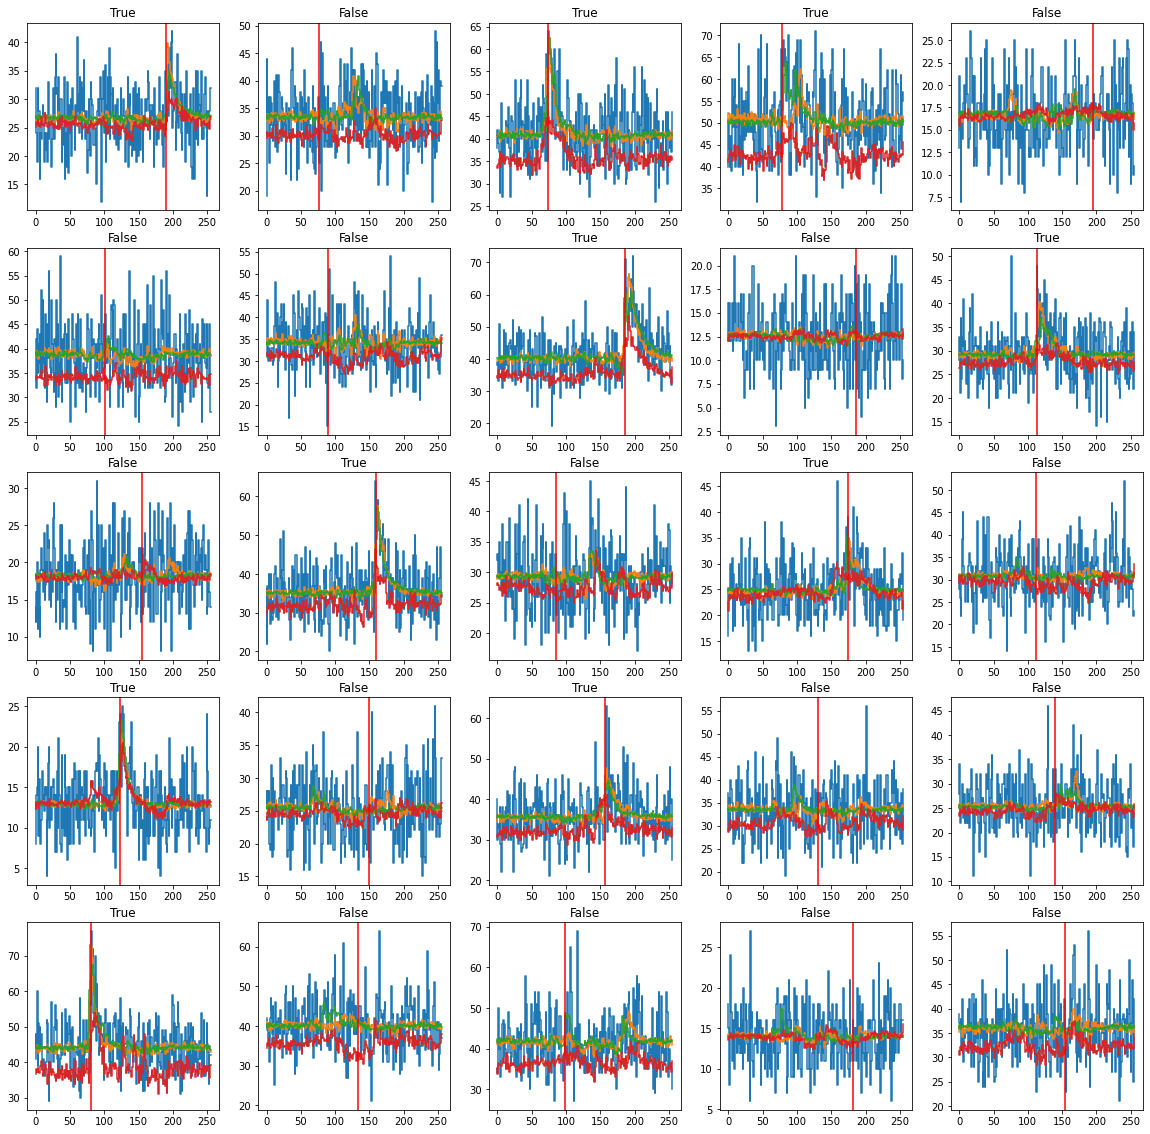

In [10]:
fig, axs = plt.subplots(5,5,figsize=(20,20))
y_pred = np.where(y_pred <= 0.5, 0, 1).reshape(-1)
y_pred_2 = np.where(y_pred_2 <= 0.5, 0, 1).reshape(-1)
y_pred_conv1d = np.where(y_pred_conv1d <= 0.5, 0, 1).reshape(-1)
colors = {True : "green", False : "red"}
x = np.arange(256)

for i in range(5):
    for j in range(5):
        ind = np.random.randint(len(y))
        #color = colors[np.array(y_pred[ind]) == np.array(y[ind])]
        #axs[i,j].set_title(bool(y_pred[ind]), color=color)
        axs[i,j].set_title(bool(y[ind]))
        axs[i,j].step(x,X[ind])
        axs[i,j].step(x,X_denoised[ind])
        axs[i,j].step(x,X_denoised_2[ind])
        axs[i,j].step(x,X_denoised_conv1d[ind])
        axs[i,j].axvline(df["x0"][ind],color="red")

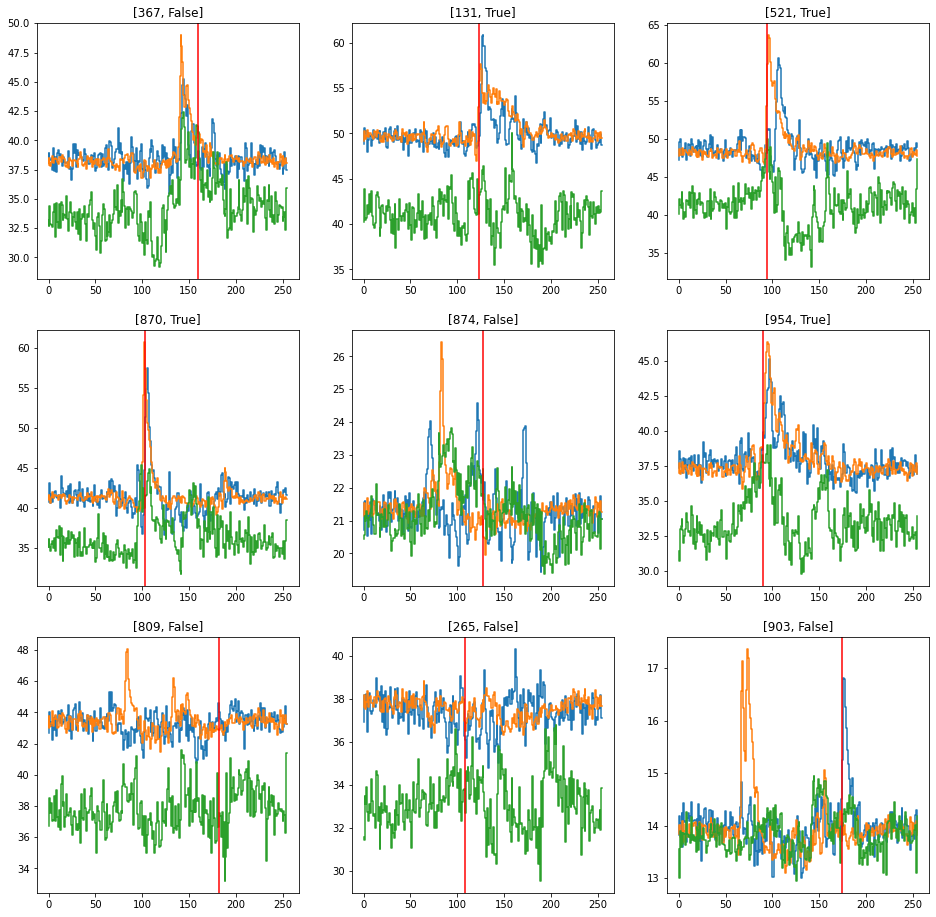

In [11]:
fig, axs = plt.subplots(3,3,figsize=(16,16))

for i in range(3):
    for j in range(3):
        ind = np.random.randint(len(y))
        #axs[i,j].set_title(bool(y[ind]))
        axs[i,j].set_title([ind, bool(y[ind])])
        #axs[i,j].step(x,X[ind])
        axs[i,j].step(x,X_denoised[ind])
        axs[i,j].step(x,X_denoised_2[ind])
        axs[i,j].step(x,X_denoised_conv1d[ind])
        axs[i,j].axvline(df["x0"][ind],color="red")

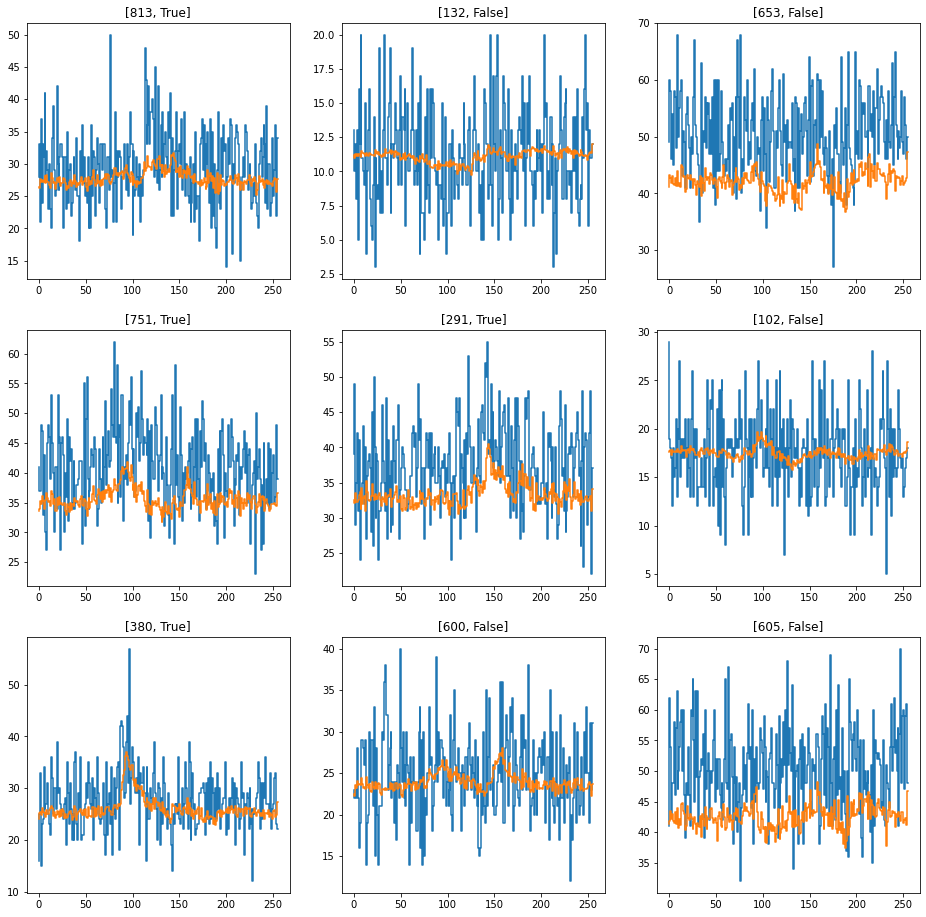

In [12]:
fig, axs = plt.subplots(3,3,figsize=(16,16))

for i in range(3):
    for j in range(3):
        ind = np.random.randint(len(y))
        #axs[i,j].set_title(bool(y[ind]))
        axs[i,j].set_title([ind, bool(y[ind])])
        axs[i,j].step(x,X[ind])
        #axs[i,j].step(x,X_denoised[ind])
        #axs[i,j].step(x,X_denoised_2[ind])
        axs[i,j].step(x,X_denoised_conv1d[ind])
        #axs[i,j].axvline(df["x0"][ind],color="red")